In this example, we demonstrate how to use **MicroMagnetic.jl** to simulate standard problem 4, which involves a thin film geometry.
We will run the simulation on a GPU, process the results, and visualize the magnetization dynamics.

Import MicroMagnetic.jl

In [1]:
using MicroMagnetic

Enable GPU acceleration

In [2]:
@using_gpu()

Define the system geometry: a film with thickness t = 3 nm, length L = 500 nm, and width d = 125 nm.
Gather all the parameters related to standard problem 4:

In [3]:
args = (name="std4", task_s=["relax", "dynamics"],           # List of tasks
        mesh=FDMesh(; nx=200, ny=50, nz=1, dx=2.5e-9, dy=2.5e-9, dz=3e-9), Ms=8e5,                                 # Saturation magnetization
        A=1.3e-11,                              # Exchange constant
        demag=true,                             # Enable demagnetization
        m0=(1, 0.25, 0.1),                      # Initial magnetization
        alpha=0.02,                             # Gilbert damping
        steps=100,                              # Number of steps for dynamics
        dt=0.01ns,                              # Time step size
        stopping_dmdt=0.01,                     # Stopping criterion for relaxation
        dynamic_m_interval=1,                   # Save magnetization at each step
        H_s=[(0, 0, 0), (-24.6mT, 4.3mT, 0)]);

Run the simulation using the `sim_with` function:

In [4]:
sim = sim_with(args);

[ Info: MicroSim has been created.
[ Info: Exchange has been added.
[ Info: Static Zeeman has been added.
[ Info: Running Driver : MicroMagnetic.EnergyMinimization{Float64}.
[ Info: max_dmdt is less than stopping_dmdt=0.01 @steps=370, Done!
[ Info: The driver LLG is used!
....................................................................................................
[ Info: step =  100  t = 1.000000e-09


With the above code, the simulation for standard problem 4 is complete. Next, we proceed to process the data,
such as visualizing the magnetization distribution or creating a movie from the simulation results.

Visualize the magnetization dynamics using CairoMakie

In [5]:
using CairoMakie

Generate a movie from the simulation results stored in the jld2 file

In [6]:
jld2movie("std4.jld2"; output="assets/std4.mp4", component='x');

Display the generated movie
![](./assets/std4.mp4)

Finally, we plot the time evolution of the magnetization components to compare the results with OOMMF simulations.

Import necessary functions to plot the time evolution of magnetization

In [7]:
using DelimitedFiles

function plot_m_ts()
    #Load data
    data, unit = read_table("std4_llg.txt")
    oommf = readdlm("assets/std4_oommf.txt")

    #Create a figure for the plot
    fig = Figure(; size=(800, 480))
    ax = Axis(fig[1, 1]; xlabel="Time (ns)", ylabel="m")

    #Plot OOMMF results
    lines!(ax, oommf[:, 1] * 1e9, oommf[:, 2]; label="OOMMF")
    lines!(ax, oommf[:, 1] * 1e9, oommf[:, 3])
    lines!(ax, oommf[:, 1] * 1e9, oommf[:, 4])

    #Plot MicroMagnetic results
    scatter!(ax, data["time"] * 1e9, data["m_x"]; markersize=6, label="MicroMagnetic.jl")
    scatter!(ax, data["time"] * 1e9, data["m_y"]; markersize=6)
    scatter!(ax, data["time"] * 1e9, data["m_z"]; markersize=6)

    #Add legend to the plot
    axislegend()

    return fig
end

plot_m_ts (generic function with 1 method)

Plot the magnetization time series

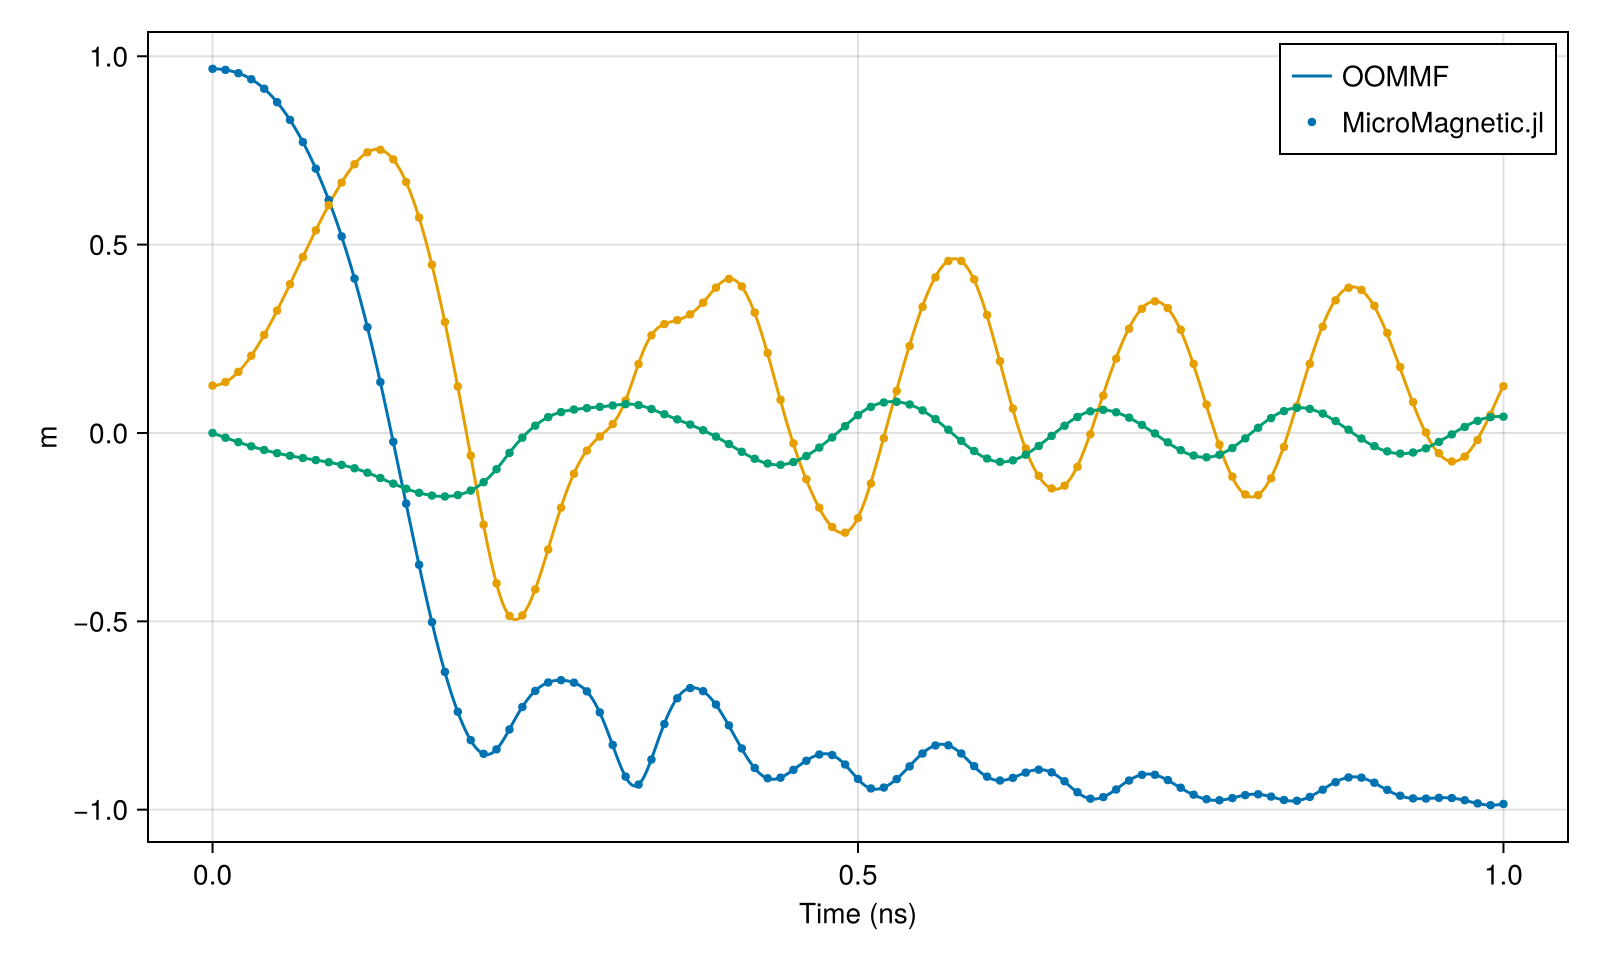

In [8]:
plot_m_ts()

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*